In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# generating data
mean_1=np.array([1,0.5])
cov_1=np.array([[1,0.1],[0.1,1.2]])

mean_2=np.array([4,5])
cov_2=np.array([[1.2,0.1],[0.1,1.3]])

dist_1=np.random.multivariate_normal(mean_1,cov_1,500)
dist_2=np.random.multivariate_normal(mean_2,cov_2,500)

In [58]:
dist_2.shape

(500, 2)

In [8]:
np.random.multivariate_normal?

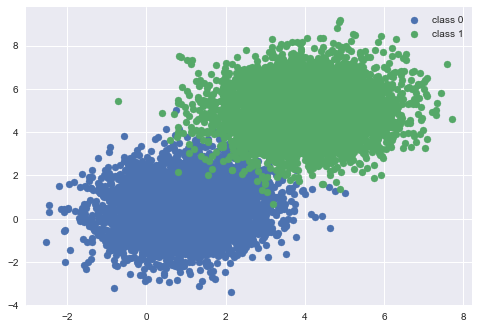

In [20]:
plt.style.use('seaborn')
plt.scatter(dist_1[:,0],dist_1[:,1],label='class 0')
plt.scatter(dist_2[:,0],dist_2[:,1], label='class 1')
plt.legend()
plt.show()

In [99]:
data=np.zeros([1000,3])
data[:500,:2]=dist_1
data[500:,:2]=dist_2
data[500:,-1]=1.0

In [100]:
np.random.shuffle(data)

In [101]:
## divide the data into test and train
split=int(0.8*data.shape[0])
x_train=data[:split,:-1]
x_test=data[split:,:-1]

y_train=data[:split,-1]
y_test=data[split:,-1]

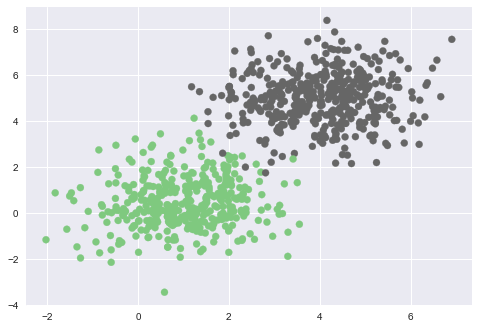

In [102]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

In [103]:
# data normalization
x_mean=x_train.mean(axis=0)
x_std=x_train.std(axis=0)

##apply the transformation on data
x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std

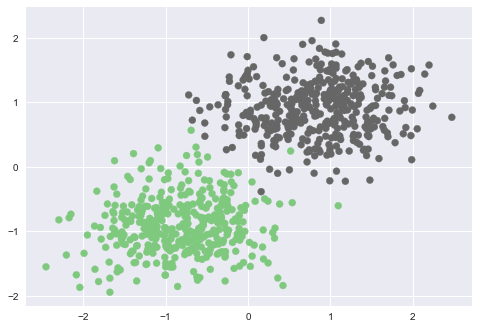

In [64]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

# Logistic Regression Implementation

In [51]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(x,theta):
    y=np.dot(x,theta)
    return sigmoid(y)
def error(x,y,theta):
    yh=hypothesis(x,theta)
    m=x.shape[0]
    loss=np.sum(y*np.log(yh)+(1-y)*np.log(1-yh))
    return -loss/m
def gradient(x,y,theta):
    hi=hypothesis(x,theta)
    m=x.shape[0]
    grad=np.dot(x.T,(y-hi))
    return grad/m

In [68]:
def gradient_descent(x,y,lr=0.5,max_iter=300):
    n=x.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_iter):
        e=error(x,y,theta)
        error_list.append(e)
        
        grad=gradient(x,y,theta)
        theta=theta+lr*grad
    return theta,error_list

In [96]:
ones=np.ones((x_train.shape[0],1))
x=np.hstack((ones,x_train))
print(x.shape)
y_train1=y_train.reshape((-1,1))

(800, 3)


In [97]:
theta,error_list=gradient_descent(x,y_train1)

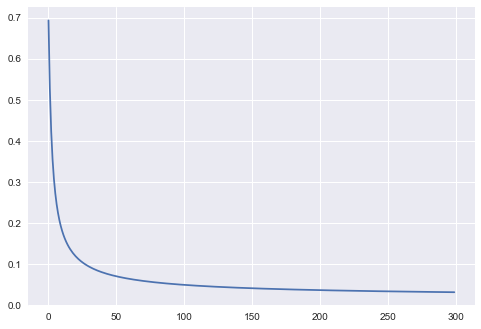

In [98]:
plt.plot(error_list)
plt.show()

In [77]:
theta

array([[-0.04486069],
       [ 2.85050459],
       [ 4.00221491]])

In [48]:
sigmoid(-100)

3.7200759760208356e-44

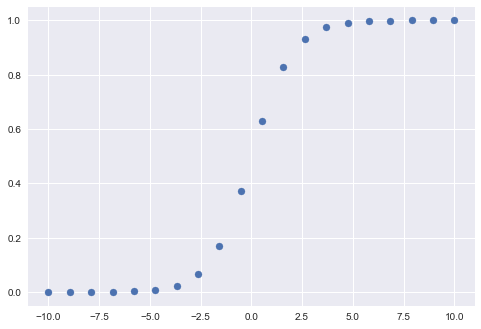

In [49]:
a=np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a))

# visualise decision surface

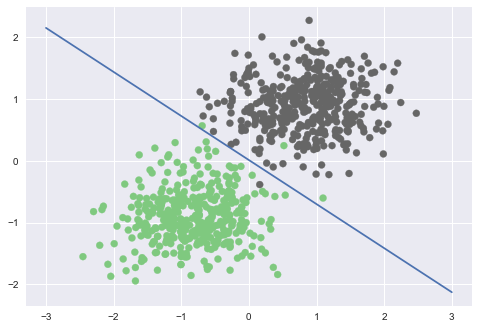

In [80]:
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2] ## to plot the line
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1,1)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

## prediction and accuracy

In [108]:
ones=np.ones((x_test.shape[0],1))
x_test1=np.hstack((ones,x_test))
print(x_test1.shape)
y_test1=y_test.reshape((-1,1))

(200, 3)


In [89]:
def predict(x,theta):
    h=hypothesis(x,theta)
    print(h[:5,:])
    output=np.zeros(h.shape)
    output[h>=0.5]=1
    print(output[:5,:])
    output=output.astype('int')
    return output

[[9.74774689e-01]
 [9.65436007e-04]
 [9.99983807e-01]
 [9.48173645e-01]
 [2.20062307e-02]]
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [90]:
train_outpt = predict(x,theta)
test_outpt = predict(x_test1,theta)

[[9.99512378e-01]
 [7.99102227e-06]
 [1.49788883e-03]
 [9.08806973e-01]
 [9.97383106e-01]]
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]
[[9.74774689e-01]
 [9.65436007e-04]
 [9.99983807e-01]
 [9.48173645e-01]
 [2.20062307e-02]]
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [91]:
def accuracy(actual,predict):
    actual=actual.astype(int)
    acc=np.sum(actual==predict)/actual.shape[0]
    return acc*100


In [111]:
train_acc=accuracy(y_train1,train_outpt)
test_acc=accuracy(y_test1,test_outpt)
print(train_acc)
print(test_acc)

99.5
48.5


# Logistic Regression using Sklearn

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model=LogisticRegression()

In [104]:
model.fit(x_train,y_train)

LogisticRegression()

In [107]:
theta_0=model.intercept_
theta=model.coef_

In [106]:
theta_0

array([0.42346551])

In [113]:
model.score(x_train,y_train)

0.99375

In [114]:
model.score(x_test,y_test)

0.985

In [116]:
y_pred=model.predict(x_test)

In [117]:
y_pred

array([0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.])